### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from wordcloud import WordCloud
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import nltk
import regex
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AMAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#Reading the data
df = pd.read_csv('Survey.csv')
df.head()

,Timestamp,Name,Score,Age,Gender,Employment Status,Do you watch sports,"If no, do you plan to start watching sports","If yes, in which year did u start watching sports (estimate)",Has your interest towards sports deepened over time,...,What time you preferred to watch a sport,Rate the following sporting events in order of how closely you followed them [0 - Didn’t Watch Any Games],Rate the following sporting events in order of how closely you followed them [1 - Kept Myself Informed About The Results],Rate the following sporting events in order of how closely you followed them [2 - Occasionally Watched Games],Rate the following sporting events in order of how closely you followed them [3 - Watched The Important Games],Rate the following sporting events in order of how closely you followed them [4 - Watched Almost All Games],Rate the following sporting events in order of how closely you followed them [5 - Watched All Games],Which sport did you prefer to watch before the pandemic,Did your preference for sport change during the pandemic,"If yes, what sport got you engaged during the pandemic"
0,23-04-2023 11:06,Nixon Joji,NaN,23,Male,Student,Yes,NaN,2010,Yes,...,Night,NaN,NaN,Olympics 2016,"FIFA 2018, Olympics 2020",FIFA 2022,NaN,Football,No,NaN
1,23-04-2023 11:14,Supraja,NaN,21,Female,Student,No,No,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Badminton,No,NaN
2,23-04-2023 11:18,Anjali. A. Sunil,NaN,22,Female,Student,No,Maybe,NaN,No,...,Night,Olympics 2020,Olympics 2016,Olympics 2016,Olympics 2020,Olympics 2020,Olympics 2016,Swimming,No,NaN
3,23-04-2023 11:26,Reyona,NaN,22,Female,Student,Sometimes,Maybe,NaN,No,...,Night,FIFA 2018,"FIFA 2022, Olympics 2020",NaN,NaN,NaN,NaN,Ice skating,Yes,Fencing
4,23-04-2023 11:26,Joel,NaN,24,Male,Employed,Yes,NaN,2000,Yes,...,Night,"FIFA 2018, FIFA 2022, Olympics 2016, Olympics ...",NaN,NaN,NaN,NaN,NaN,Esports,No,NaN


# PRE-PROCESSING AND CLEANING

### Dropping irrelavant columns

In [3]:
df = df.drop(columns=['Timestamp', 'Score'])
df.head()

,Name,Age,Gender,Employment Status,Do you watch sports,"If no, do you plan to start watching sports","If yes, in which year did u start watching sports (estimate)",Has your interest towards sports deepened over time,"If yes, what might be the reason (eg. Lockdown, Online Classes etc)",Do you indulge in betting in fantasy sports,...,What time you preferred to watch a sport,Rate the following sporting events in order of how closely you followed them [0 - Didn’t Watch Any Games],Rate the following sporting events in order of how closely you followed them [1 - Kept Myself Informed About The Results],Rate the following sporting events in order of how closely you followed them [2 - Occasionally Watched Games],Rate the following sporting events in order of how closely you followed them [3 - Watched The Important Games],Rate the following sporting events in order of how closely you followed them [4 - Watched Almost All Games],Rate the following sporting events in order of how closely you followed them [5 - Watched All Games],Which sport did you prefer to watch before the pandemic,Did your preference for sport change during the pandemic,"If yes, what sport got you engaged during the pandemic"
0,Nixon Joji,23,Male,Student,Yes,NaN,2010,Yes,Regular Updates,No,...,Night,NaN,NaN,Olympics 2016,"FIFA 2018, Olympics 2020",FIFA 2022,NaN,Football,No,NaN
1,Supraja,21,Female,Student,No,No,NaN,No,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Badminton,No,NaN
2,Anjali. A. Sunil,22,Female,Student,No,Maybe,NaN,No,NaN,No,...,Night,Olympics 2020,Olympics 2016,Olympics 2016,Olympics 2020,Olympics 2020,Olympics 2016,Swimming,No,NaN
3,Reyona,22,Female,Student,Sometimes,Maybe,NaN,No,NaN,No,...,Night,FIFA 2018,"FIFA 2022, Olympics 2020",NaN,NaN,NaN,NaN,Ice skating,Yes,Fencing
4,Joel,24,Male,Employed,Yes,NaN,2000,Yes,Lockdown free time,No,...,Night,"FIFA 2018, FIFA 2022, Olympics 2016, Olympics ...",NaN,NaN,NaN,NaN,NaN,Esports,No,NaN


In [4]:
#Extracting the 4 rating columns from the dataset into a sub dataframe and removing those columns from the main dataset
rating_events = df.iloc[:,-9:-3]
rating_events
sub = rating_events.columns
df = df.drop(columns=sub)
df.head()

,Name,Age,Gender,Employment Status,Do you watch sports,"If no, do you plan to start watching sports","If yes, in which year did u start watching sports (estimate)",Has your interest towards sports deepened over time,"If yes, what might be the reason (eg. Lockdown, Online Classes etc)",Do you indulge in betting in fantasy sports,...,Pre-Pandemic sports consumption,"If not never, how many hours a week on an estimated average you used to consume sport content",During Pandemic sports consumption,"If not never, how many hours a week on an estimated average you used to consume sport content.1",During the pandemic did you prefer watching,"Channels used to watch sport(eg. online streaming, TV)",What time you preferred to watch a sport,Which sport did you prefer to watch before the pandemic,Did your preference for sport change during the pandemic,"If yes, what sport got you engaged during the pandemic"
0,Nixon Joji,23,Male,Student,Yes,NaN,2010,Yes,Regular Updates,No,...,Weekly,02-Apr,Weekly,04-Jun,Live sport,Online Streaming,Night,Football,No,NaN
1,Supraja,21,Female,Student,No,No,NaN,No,NaN,No,...,Rarely,Less than 2,Rarely,Less than 2,None,no,NaN,Badminton,No,NaN
2,Anjali. A. Sunil,22,Female,Student,No,Maybe,NaN,No,NaN,No,...,Rarely,Less than 2,Rarely,Less than 2,None,TV,Night,Swimming,No,NaN
3,Reyona,22,Female,Student,Sometimes,Maybe,NaN,No,NaN,No,...,Rarely,Less than 2,Rarely,Less than 2,Highlight,Youtube,Night,Ice skating,Yes,Fencing
4,Joel,24,Male,Employed,Yes,NaN,2000,Yes,Lockdown free time,No,...,Rarely,Less than 2,Weekly,More than 6,Live sport,Online streaming,Night,Esports,No,NaN


In [5]:
#Getting the column names 
df.columns

Index(['Name', 'Age', 'Gender', 'Employment Status', 'Do you watch sports',
       'If no, do you plan to start watching sports',
       'If yes, in which year did u start watching sports (estimate)',
       'Has your interest towards sports deepened over time',
       'If yes, what might be the reason (eg. Lockdown, Online Classes etc)',
       'Do you indulge in betting in fantasy sports',
       'If yes, When did you start the same (approx)',
       'Pre-Pandemic sports consumption',
       'If not never, how many hours a week on an estimated average you used to consume sport content',
       'During Pandemic sports consumption',
       'If not never, how many hours a week on an estimated average you used to consume sport content.1',
       'During the pandemic did you prefer watching',
       'Channels used to watch sport(eg. online streaming, TV)',
       'What time you preferred to watch a sport',
       'Which sport did you prefer to watch before the pandemic ',
       'Did your

### Changing the column names 

In [6]:

cols = ['Name', 'Age', 'Gender', 'Employment Status', 'Do you watch Sports', 'Do you plan to start watching sports', 'Start Year (Watching)', 'Interest Deepened?(Y/N)', 'Reason', 'Betting', 'Start Year(Betting)', 'Consumption Frequency (Pre-Pandemic)', 'Average Consumption (Pre-Pandemic)', 'Consumption Frequency (During Pandemic)', 'Average Consumption (During Pandemic)', 'Watching Preference', 'Streaming Channels', 'Time Preference', 'Sports Preference(Pre-Pandemic)', 'Change in Preference (Y/N)', 'Sports Preference (During Pandemic)']
df = df.set_axis(cols, inplace=False,axis=1) 

In [7]:
df

,Name,Age,Gender,Employment Status,Do you watch Sports,Do you plan to start watching sports,Start Year (Watching),Interest Deepened?(Y/N),Reason,Betting,...,Consumption Frequency (Pre-Pandemic),Average Consumption (Pre-Pandemic),Consumption Frequency (During Pandemic),Average Consumption (During Pandemic),Watching Preference,Streaming Channels,Time Preference,Sports Preference(Pre-Pandemic),Change in Preference (Y/N),Sports Preference (During Pandemic)
0,Nixon Joji,23,Male,Student,Yes,NaN,2010,Yes,Regular Updates,No,...,Weekly,02-Apr,Weekly,04-Jun,Live sport,Online Streaming,Night,Football,No,NaN
1,Supraja,21,Female,Student,No,No,NaN,No,NaN,No,...,Rarely,Less than 2,Rarely,Less than 2,None,no,NaN,Badminton,No,NaN
2,Anjali. A. Sunil,22,Female,Student,No,Maybe,NaN,No,NaN,No,...,Rarely,Less than 2,Rarely,Less than 2,None,TV,Night,Swimming,No,NaN
3,Reyona,22,Female,Student,Sometimes,Maybe,NaN,No,NaN,No,...,Rarely,Less than 2,Rarely,Less than 2,Highlight,Youtube,Night,Ice skating,Yes,Fencing
4,Joel,24,Male,Employed,Yes,NaN,2000,Yes,Lockdown free time,No,...,Rarely,Less than 2,Weekly,More than 6,Live sport,Online streaming,Night,Esports,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Abhishek,23,Male,Student,Yes,NaN,2005,Yes,Interest in teams,Yes,...,Weekly,More than 6,Weekly,More than 6,Live sport,"Hotstar, jio tv",Night,Football,No,Football
99,Imran,23,Male,Student,Yes,NaN,2015,Yes,"Lock down, Entertainment",No,...,Weekly,Less than 2,Daily,02-Apr,Live sport,Tv,Day,NaN,No,NaN
100,Sanjay Karthik M,21,Male,Student,Yes,NaN,2010,Yes,Dhoni,Yes,...,Daily,Less than 2,Weekly,04-Jun,Both,"Star sports , Ten Sports , Sony Six",Night,Cricket,No,NaN
101,Sinchana,22,Female,Student,Yes,NaN,2006,No,NaN,No,...,Weekly,Less than 2,Monthly,Less than 2,None,Star sports,Night,Cricket,Yes,Kabaddi


### Replacing with logical values

In [8]:
#Replacing the NaN values with "Already Watching" of column name "Do you plan to start watching sports"
df['Do you plan to start watching sports'] = df['Do you plan to start watching sports'].replace(np.NaN, 'Already Watching')

In [9]:
#Replacing all string values into NaN 
df['Start Year(Betting)'] = df['Start Year(Betting)'].replace(r'[^0-9]', np.NaN, regex=True)
df['Start Year (Watching)'] = df['Start Year (Watching)'].replace(r'[^0-9]', np.NaN, regex=True)

In [10]:
#Replacing Date formatted values to valid values
df['Average Consumption (During Pandemic)']=df['Average Consumption (During Pandemic)'].replace('02-Apr','2-4')
df['Average Consumption (During Pandemic)']=df['Average Consumption (During Pandemic)'].replace('04-Jun','4-6')
df['Average Consumption (Pre-Pandemic)']=df['Average Consumption (Pre-Pandemic)'].replace('02-Apr','2-4')
df['Average Consumption (Pre-Pandemic)']=df['Average Consumption (Pre-Pandemic)'].replace('04-Jun','4-6')
df

,Name,Age,Gender,Employment Status,Do you watch Sports,Do you plan to start watching sports,Start Year (Watching),Interest Deepened?(Y/N),Reason,Betting,...,Consumption Frequency (Pre-Pandemic),Average Consumption (Pre-Pandemic),Consumption Frequency (During Pandemic),Average Consumption (During Pandemic),Watching Preference,Streaming Channels,Time Preference,Sports Preference(Pre-Pandemic),Change in Preference (Y/N),Sports Preference (During Pandemic)
0,Nixon Joji,23,Male,Student,Yes,Already Watching,2010,Yes,Regular Updates,No,...,Weekly,2-4,Weekly,4-6,Live sport,Online Streaming,Night,Football,No,NaN
1,Supraja,21,Female,Student,No,No,NaN,No,NaN,No,...,Rarely,Less than 2,Rarely,Less than 2,None,no,NaN,Badminton,No,NaN
2,Anjali. A. Sunil,22,Female,Student,No,Maybe,NaN,No,NaN,No,...,Rarely,Less than 2,Rarely,Less than 2,None,TV,Night,Swimming,No,NaN
3,Reyona,22,Female,Student,Sometimes,Maybe,NaN,No,NaN,No,...,Rarely,Less than 2,Rarely,Less than 2,Highlight,Youtube,Night,Ice skating,Yes,Fencing
4,Joel,24,Male,Employed,Yes,Already Watching,2000,Yes,Lockdown free time,No,...,Rarely,Less than 2,Weekly,More than 6,Live sport,Online streaming,Night,Esports,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Abhishek,23,Male,Student,Yes,Already Watching,2005,Yes,Interest in teams,Yes,...,Weekly,More than 6,Weekly,More than 6,Live sport,"Hotstar, jio tv",Night,Football,No,Football
99,Imran,23,Male,Student,Yes,Already Watching,2015,Yes,"Lock down, Entertainment",No,...,Weekly,Less than 2,Daily,2-4,Live sport,Tv,Day,NaN,No,NaN
100,Sanjay Karthik M,21,Male,Student,Yes,Already Watching,2010,Yes,Dhoni,Yes,...,Daily,Less than 2,Weekly,4-6,Both,"Star sports , Ten Sports , Sony Six",Night,Cricket,No,NaN
101,Sinchana,22,Female,Student,Yes,Already Watching,2006,No,NaN,No,...,Weekly,Less than 2,Monthly,Less than 2,None,Star sports,Night,Cricket,Yes,Kabaddi


In [11]:
#df["Sports Preference(Pre-Pandemic)"].value_counts()

In [12]:
#Filling the NaN values of "Sports Preference (During Pandemic)"  with the same value as "Sports Preference(Pre-Pandemic)" since their preference hasn't change
(df['Sports Preference (During Pandemic)']).fillna(df['Sports Preference(Pre-Pandemic)'], inplace=True)

In [13]:
df['Age'].value_counts()

23    22
21    18
22    17
24    12
25     9
26     4
18     3
28     3
29     2
30     2
33     2
20     2
27     2
56     1
52     1
16     1
59     1
32     1
Name: Age, dtype: int64

In [14]:
#Converting continous ages into Age groups
bins=[0,20,22,24,26,28,30,60]
labels = ['Under 20', '21-22','23-24','25-26','27-28','28-30','Above 30']
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels)

# VISUALIZATION AND EDA

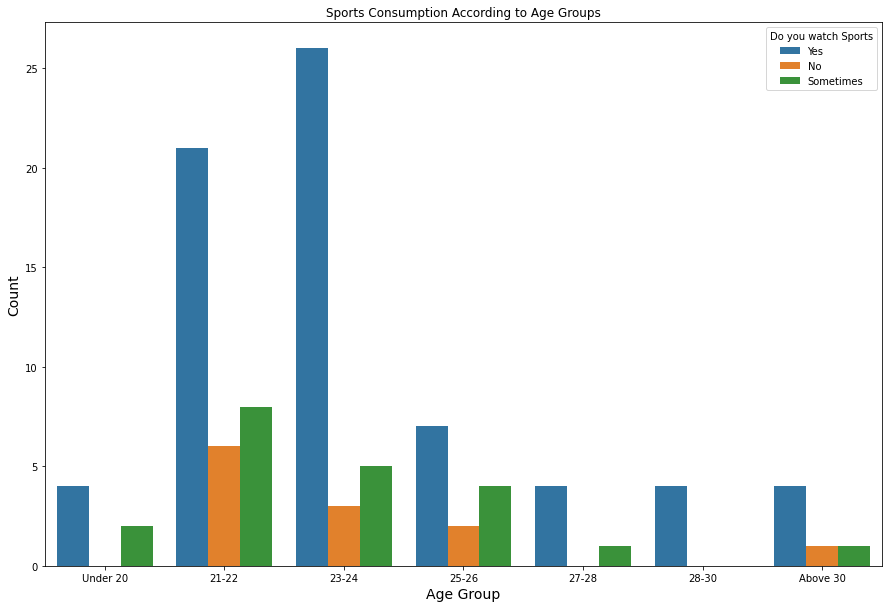

In [15]:

plt.subplots(1, 1, figsize=(15, 10))
sns.countplot(x='Age',hue='Do you watch Sports', data=df)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Sports Consumption According to Age Groups")
plt.show()

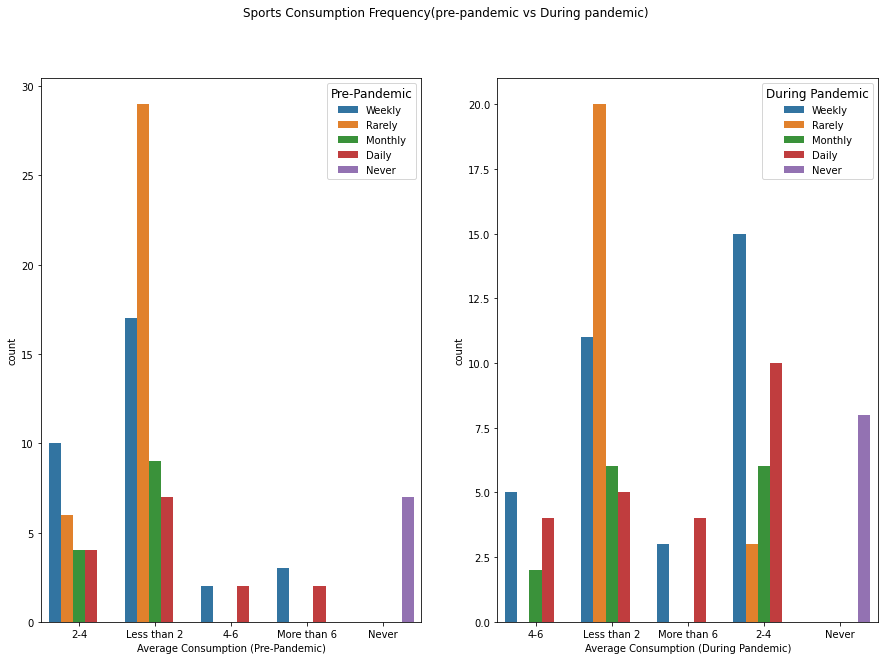

In [16]:

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
sns.countplot(x='Average Consumption (Pre-Pandemic)',hue='Consumption Frequency (Pre-Pandemic)', data=df, ax=axes[0])
axes[0].legend(title='Pre-Pandemic',title_fontsize=12, loc='upper right')
sns.countplot(x='Average Consumption (During Pandemic)',hue='Consumption Frequency (During Pandemic)', data=df, ax=axes[1])
axes[1].legend(title='During Pandemic',title_fontsize=12, loc='upper right')
plt.suptitle("Sports Consumption Frequency(pre-pandemic vs During pandemic)",ha="center")
plt.show()

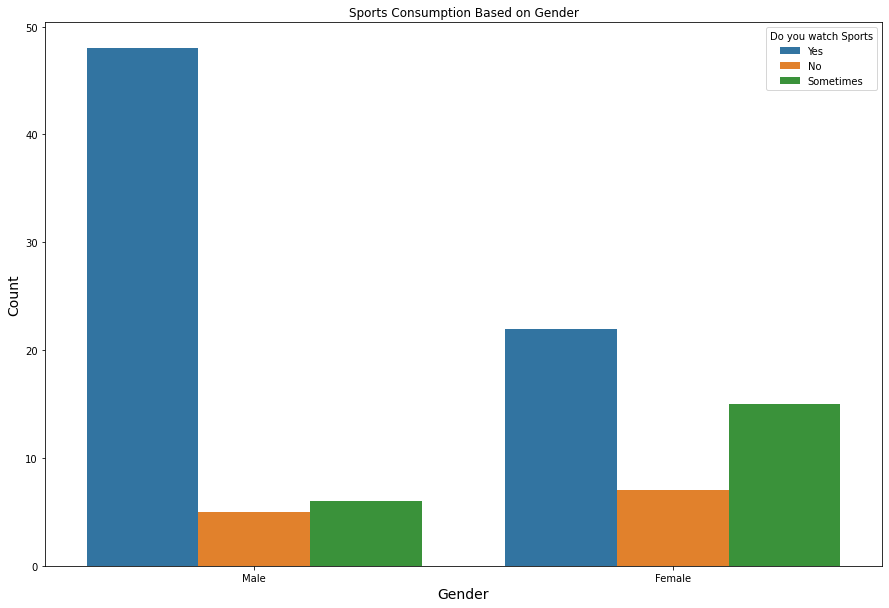

In [17]:

plt.subplots(1, 1, figsize=(15, 10))
sns.countplot(x='Gender',hue='Do you watch Sports', data=df)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Sports Consumption Based on Gender")
plt.show()

In [18]:
#Sporting preferences with low frequencies is replaced with "Others"
df['Sports Preference(Pre-Pandemic)'] = df['Sports Preference(Pre-Pandemic)'].replace(['Kabaddi','Ice skating','Esports','Tennis','Tennis ','Hockey','Hockey '],'Others')
df['Sports Preference (During Pandemic)'] = df['Sports Preference (During Pandemic)'].replace(['Swimming','Basketball','Basketball ','VolleyBall','Volleyball ','Tennis','Tennis ','Boxing','Boxing ','Golf','Na','Esports','Fencing','F1'],'Others')
print(df['Sports Preference(Pre-Pandemic)'].value_counts())
print(df['Sports Preference (During Pandemic)'].value_counts())


Cricket       56
Football      17
Badminton     10
Others         9
VolleyBall     4
Swimming       3
Name: Sports Preference(Pre-Pandemic), dtype: int64
Cricket      43
Football     21
Others       16
Badminton     8
Kabaddi       8
Hockey        3
Name: Sports Preference (During Pandemic), dtype: int64


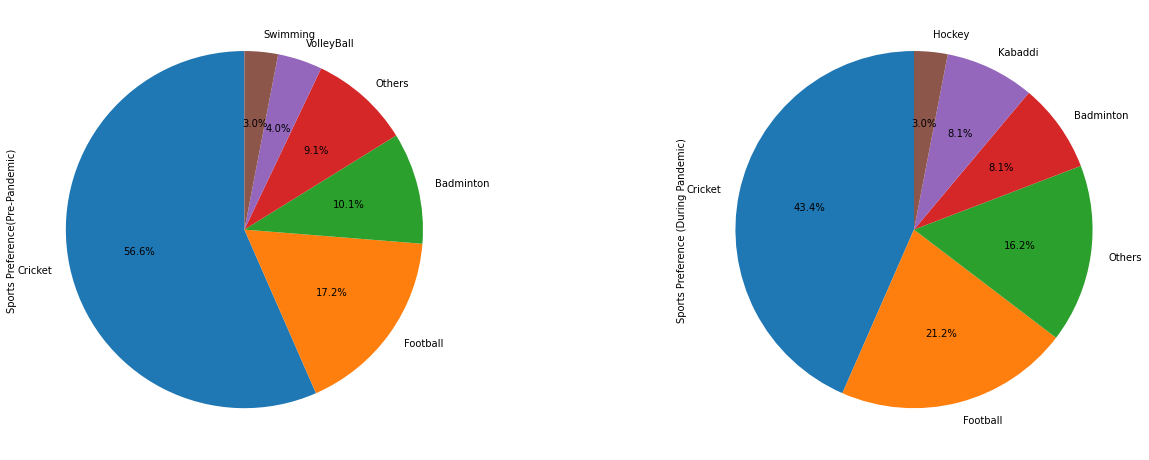

In [19]:
#Sports Preference(Pre-Pandemic vs During Pandemic)
fig, axes = plt.subplots(1, 2, figsize=(20, 35))
df["Sports Preference(Pre-Pandemic)"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90,ax=axes[0])
df["Sports Preference (During Pandemic)"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90,ax=axes[1])
plt.subplots_adjust(wspace=0.5)


In [20]:
#FACTORIZING THE CONSUMPTION FREQUENCY
#df['Consumption Frequency (During Pandemic)'] = df['Consumption Frequency (During Pandemic)'].replace(['Daily','Weekly','Monthly','Rarely','Never'],[1,2,3,4,5])
#df['Consumption Frequency (Pre-Pandemic)'] = df['Consumption Frequency (Pre-Pandemic)'].replace(['Daily','Weekly','Monthly','Rarely','Never'],[1,2,3,4,5])

## CHI-SQUARE TEST FOR HYPOTHESIS

Null Hypothesis:There is significant change in Consumption Frequency

Alternate Hypothesis:There is no significant change in Consumption Frequency

In [21]:
observed= pd.crosstab(df["Consumption Frequency (Pre-Pandemic)"], df['Consumption Frequency (During Pandemic)'])

In [22]:
chi2, p_val, dof, expected = chi2_contingency(observed)

In [23]:
confusion_matrix = np.vstack((observed.T, expected.T)).T
confusion_matrix = np.round(confusion_matrix, 2)

In [24]:
print("Confusion Matrix:")
print("{:<20} {:<20} {:<20}".format("Category", "Observed", "Expected"))
for i in range(len(confusion_matrix)):
    print("{:<20} {:<20} {:<20}".format(str(confusion_matrix[i][0]), str(confusion_matrix[i][1]), str(confusion_matrix[i][2])))

Confusion Matrix:
Category             Observed             Expected            
10.0                 1.0                  0.0                 
2.0                  5.0                  0.0                 
1.0                  0.0                  6.0                 
2.0                  5.0                  2.0                 
9.0                  3.0                  0.0                 


In [35]:
print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value: {:.21f}".format(p_val))
print("Expected frequencies:", expected)

Chi-square statistic: 119.33220314846953
Degrees of freedom: 16
P-value: 0.000000000000000007382
Expected frequencies: [[ 3.49514563  2.03883495  1.16504854  3.34951456  4.95145631]
 [ 3.26213592  1.90291262  1.08737864  3.12621359  4.62135922]
 [ 1.63106796  0.95145631  0.54368932  1.5631068   2.31067961]
 [ 8.15533981  4.75728155  2.7184466   7.81553398 11.55339806]
 [ 7.45631068  4.34951456  2.48543689  7.14563107 10.5631068 ]]


INFERENCE:There is significance difference in Consumption Frequency 


## CLASSIFICATION MODEL

In [ ]:
X = pd.factorize(df['Sports Preference(Pre-Pandemic)'])[0]
y = pd.factorize(df['Change in Preference (Y/N)'])[0]

In [ ]:
X = X.reshape(-1, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test.astype(float)

In [ ]:
reg = LogisticRegression()
reg.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_binary)

In [ ]:
accuracy

## WordCloud

In [ ]:
df['Reason']=df['Reason'].replace(np.NaN,"None")

In [ ]:
df["Reason"]=df["Reason"].str.lower()

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stopwords = set(['none','unspecified']+stop_words)
df['Reason'].value_counts()

In [ ]:
#Wordcloud for the reason of change in preference
text = ' '.join(df['Reason'])
wordcloud = WordCloud(width=800, height=800, background_color='white',stopwords=stopwords, min_font_size=10).generate(text)

plt.figure(figsize=(4,4), facecolor=None)
plt.imshow(wordcloud)

plt.axis('off')
plt.tight_layout(pad=0)
  
plt.show()